In [78]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import io, base64, os, json, re 
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')

In [79]:
gold_df = pd.read_csv('LBMA-GOLD.csv')
gold_df['Date'] = pd.to_datetime(gold_df['Date'])

gold_df = gold_df[['Date', 'USD (AM)']]
gold_df.columns = ['Date', 'GLD']
gold_df['GLD'] = pd.to_numeric(gold_df['GLD'], errors='coerce')

print(np.min(gold_df['Date'] ),np.max(gold_df['Date'] ))
gold_df = gold_df.sort_values('Date', ascending=True) 
gold_df = gold_df.dropna(how='any')

gold_df.head()

1968-01-02 00:00:00 2020-02-04 00:00:00


,Date,GLD
13166,1968-01-02,35.18
13165,1968-01-03,35.16
13164,1968-01-04,35.14
13163,1968-01-05,35.14
13162,1968-01-08,35.14


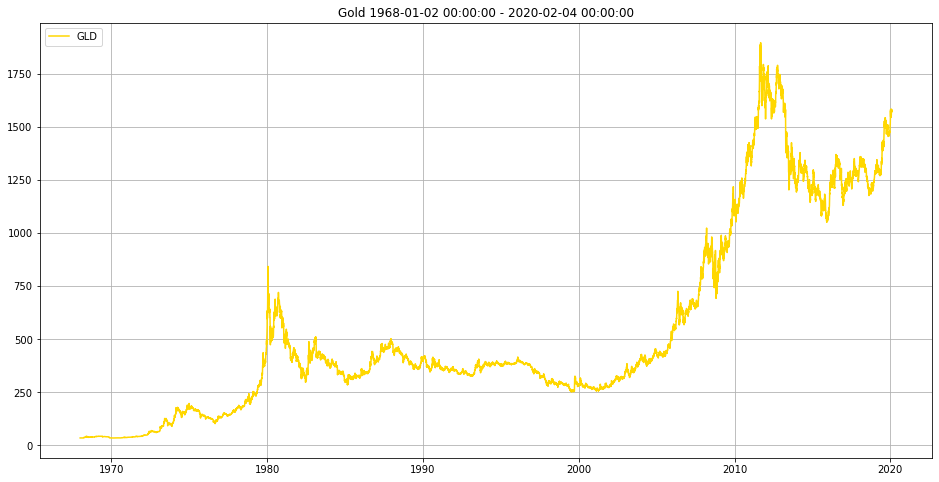

In [80]:
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(gold_df['Date'], gold_df['GLD'], label='GLD', color='gold')
plt.title('Gold ' + str(np.min(gold_df['Date'])) + ' - ' + str(np.max(gold_df['Date'])))
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [81]:
def split_seq(seq, num_pieces):
    # https://stackoverflow.com/questions/54915803/automatically-split-data-in-list-and-order-list-elements-and-send-to-function
    start = 0
    for i in range(num_pieces):
        stop = start + len(seq[i::num_pieces])
        yield seq[start:stop]
        start = stop
        
        
def pearson(s1, s2):
    """take two pd.Series objects and return a pearson corrleation"""
    s1_c=s1-np.mean(s1)
    s2_c=s2-np.mean(s2)
    return np.sum(s1_c * s2_c) / np.sqrt(np.sum(s1_c ** 2) * np.sum(s2_c ** 2))

In [82]:
 # we don't need to do this, just emphasizing 
gold_df = gold_df.sort_values('Date', ascending=True) 

lookback = 30
dates = gold_df['Date']
prices = list(gold_df['GLD'].values)
counter_ = -1
price_series = []
for day in dates:
    counter_ += 1
    # if counter_ % 1000 == 0: print(counter_)
    if counter_ >= lookback:
        price_series.append(prices[counter_-lookback:counter_])
                
timeseries_df = pd.DataFrame(price_series)   

In [83]:
timeseries_df.shape

(13136, 30)

In [84]:
timeseries_df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,35.18,35.16,35.14,35.14,35.14,35.14,35.15,35.17,35.18,35.18,...,35.19,35.20,35.20,35.20,35.19,35.19,35.20,35.19,35.20,35.19
1,35.16,35.14,35.14,35.14,35.14,35.15,35.17,35.18,35.18,35.19,...,35.20,35.20,35.20,35.19,35.19,35.20,35.19,35.20,35.19,35.19
2,35.14,35.14,35.14,35.14,35.15,35.17,35.18,35.18,35.19,35.20,...,35.20,35.20,35.19,35.19,35.20,35.19,35.20,35.19,35.19,35.20
3,35.14,35.14,35.14,35.15,35.17,35.18,35.18,35.19,35.20,35.20,...,35.20,35.19,35.19,35.20,35.19,35.20,35.19,35.19,35.20,35.20
4,35.14,35.14,35.15,35.17,35.18,35.18,35.19,35.20,35.20,35.19,...,35.19,35.19,35.20,35.19,35.20,35.19,35.19,35.20,35.20,35.20


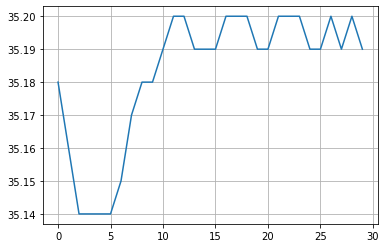

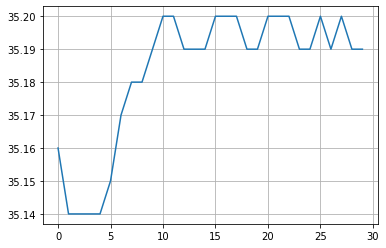

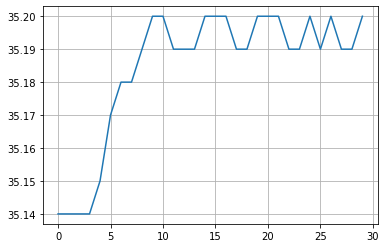

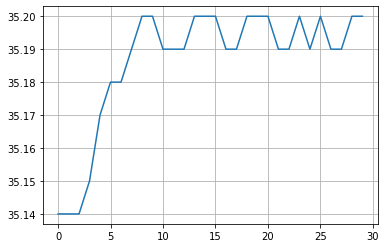

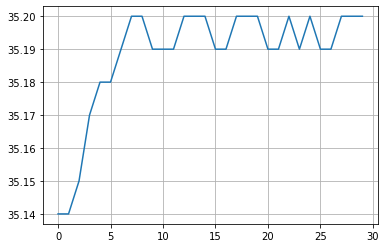

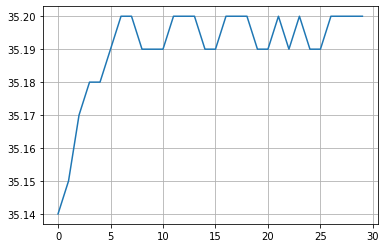

In [85]:
counter = 5
for index, row in timeseries_df.iterrows():
    counter -= 1
    # look for desired shape
    plt.plot(row.values)
    plt.grid()
    plt.show()
    if counter < 0:
        break

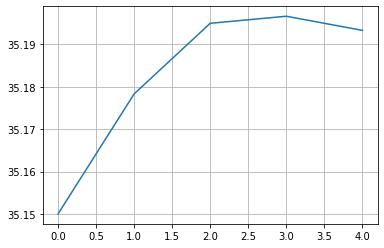

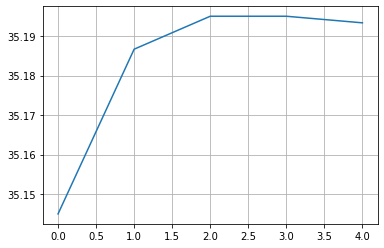

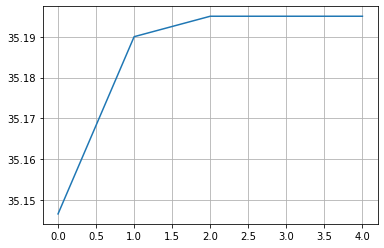

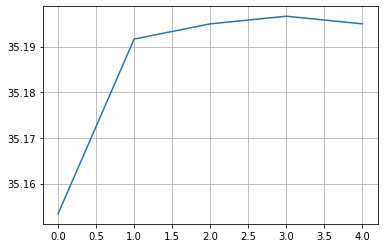

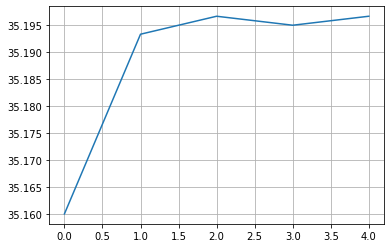

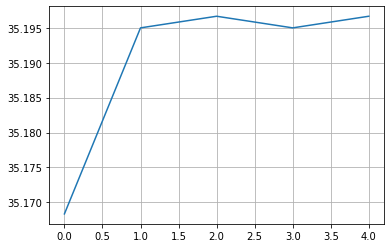

In [86]:
counter = 5
complexity = 5
for index, row in timeseries_df.iterrows():
    counter -= 1
    # look for desired shape
    plt.plot([np.mean(r) for r in split_seq(list(row.values), complexity)])
    plt.grid()
    plt.show()
    if counter < 0:
        break

In [87]:
[np.mean(t) for t in split_seq(list(row.values), complexity)]

[35.16833333333333, 35.195, 35.196666666666665, 35.195, 35.196666666666665]

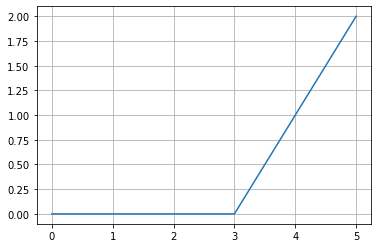

In [88]:
# let's single out the shape we want
correlate_against = [0,0,0,0,1,2] 
plt.plot(correlate_against)
plt.grid()


In [89]:
complexity = 6
outcome_list = []
for index, row in timeseries_df.iterrows():
    simplified_values = []
    for r in split_seq(list(row.values), complexity):
        simplified_values.append(np.mean(r))
    correz = pearson(simplified_values,correlate_against)
    if correz > 0.5:
        outcome_list.append(1)
    else:
        outcome_list.append(0)

In [90]:
np.mean(outcome_list)

0.3570341047503045

In [91]:
timeseries_df['outcome'] = outcome_list
timeseries_df.head(20)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,outcome
0,35.18,35.16,35.14,35.14,35.14,35.14,35.15,35.17,35.18,35.18,...,35.20,35.20,35.20,35.19,35.19,35.20,35.19,35.20,35.19,0
1,35.16,35.14,35.14,35.14,35.14,35.15,35.17,35.18,35.18,35.19,...,35.20,35.20,35.19,35.19,35.20,35.19,35.20,35.19,35.19,0
2,35.14,35.14,35.14,35.14,35.15,35.17,35.18,35.18,35.19,35.20,...,35.20,35.19,35.19,35.20,35.19,35.20,35.19,35.19,35.20,0
3,35.14,35.14,35.14,35.15,35.17,35.18,35.18,35.19,35.20,35.20,...,35.19,35.19,35.20,35.19,35.20,35.19,35.19,35.20,35.20,0
4,35.14,35.14,35.15,35.17,35.18,35.18,35.19,35.20,35.20,35.19,...,35.19,35.20,35.19,35.20,35.19,35.19,35.20,35.20,35.20,0
5,35.14,35.15,35.17,35.18,35.18,35.19,35.20,35.20,35.19,35.19,...,35.20,35.19,35.20,35.19,35.19,35.20,35.20,35.20,35.20,0
6,35.15,35.17,35.18,35.18,35.19,35.20,35.20,35.19,35.19,35.19,...,35.19,35.20,35.19,35.19,35.20,35.20,35.20,35.20,35.20,0
7,35.17,35.18,35.18,35.19,35.20,35.20,35.19,35.19,35.19,35.20,...,35.20,35.19,35.19,35.20,35.20,35.20,35.20,35.20,35.20,1
8,35.18,35.18,35.19,35.20,35.20,35.19,35.19,35.19,35.20,35.20,...,35.19,35.19,35.20,35.20,35.20,35.20,35.20,35.20,35.20,1
9,35.18,35.19,35.20,35.20,35.19,35.19,35.19,35.20,35.20,35.20,...,35.19,35.20,35.20,35.20,35.20,35.20,35.20,35.20,35.20,1


In [92]:
timeseries_df_tmp = timeseries_df[timeseries_df['outcome']==1]
timeseries_df_tmp.tail()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,outcome
13131,1470.6,1477.4,1478.40,1478.90,1474.40,1476.90,1483.95,1490.85,1510.60,1511.50,...,1555.20,1556.50,1559.25,1556.25,1558.10,1554.05,1561.85,1583.45,1579.60,1
13132,1477.4,1478.4,1478.90,1474.40,1476.90,1483.95,1490.85,1510.60,1511.50,1523.00,...,1556.50,1559.25,1556.25,1558.10,1554.05,1561.85,1583.45,1579.60,1571.20,1
13133,1478.4,1478.9,1474.40,1476.90,1483.95,1490.85,1510.60,1511.50,1523.00,1520.55,...,1559.25,1556.25,1558.10,1554.05,1561.85,1583.45,1579.60,1571.20,1580.40,1
13134,1478.9,1474.4,1476.90,1483.95,1490.85,1510.60,1511.50,1523.00,1520.55,1547.40,...,1556.25,1558.10,1554.05,1561.85,1583.45,1579.60,1571.20,1580.40,1580.85,1
13135,1474.4,1476.9,1483.95,1490.85,1510.60,1511.50,1523.00,1520.55,1547.40,1576.85,...,1558.10,1554.05,1561.85,1583.45,1579.60,1571.20,1580.40,1580.85,1578.85,1


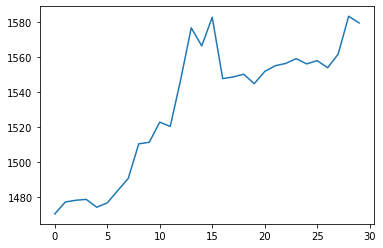

In [93]:
timeseries_df_tmp = timeseries_df_tmp.tail()
# pull one example and remove the outcome variable
example = timeseries_df_tmp.values[0][:-1]
plt.plot(example)

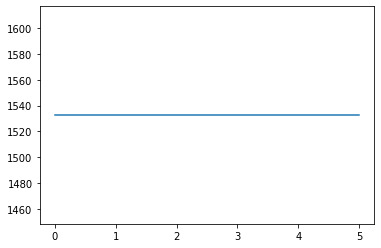

In [94]:
simplified_values = []
for r in split_seq(list(example), complexity):
    simplified_values.append(np.mean(example))
plt.plot(simplified_values)

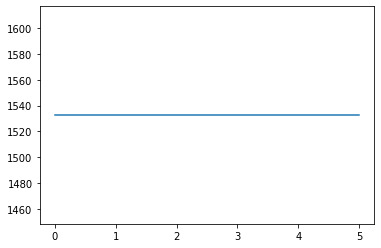

In [95]:
simplified_values = []
for r in split_seq(list(example), complexity):
    simplified_values.append(np.mean(example))
plt.plot(simplified_values)

In [ ]:
#Conclusion:
#This is a machine learning based Gold stock market algorithm used to recognize pattern and recognise outcome types 
#depending on past variables

#It can also be use to model raw time series for classification
    